In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [4]:
df.drop(columns='show_id',inplace=True)

In [5]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [6]:
df.dropna(subset = ["date_added"],inplace=True)
df['date_added'].isna().sum()

np.int64(0)

In [7]:
df.dropna(subset = ["rating"],inplace=True)
df['rating'].isna().sum()

np.int64(0)

In [8]:
df.dropna(subset = ["duration"],inplace=True)
df['duration'].isna().sum()

np.int64(0)

In [9]:
df["date_added"] = pd.to_datetime(df["date_added"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [10]:
df["date_added"].isnull().sum()

np.int64(88)

In [11]:
df.dropna(subset = ["date_added"],inplace=True)
df['date_added'].isna().sum()

np.int64(0)

In [12]:
df["day"] = df["date_added"].dt.day
df["month"] = df["date_added"].dt.month
df["year"] = df["date_added"].dt.year
df["month_name"] = df["date_added"].dt.month_name()
df["weekday"] = df["date_added"].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [13]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [15]:
df["rating"].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [16]:
df["rating"].isna().sum()

np.int64(81)

In [17]:
df.dropna(subset = ["rating"],inplace=True)
df["rating"].isna().sum()

np.int64(0)

In [18]:
df.isna().sum()

type               0
title              0
director        2535
cast             800
country          826
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

In [19]:
df[(df["director"].isna()) & (df["country"].isna()) & (df["cast"].isna())].shape[0]

96

In [20]:
df.shape

(8621, 16)

In [21]:
df.dropna(subset = ["director","country","cast"],how ="all",inplace=True)

In [22]:
df.shape

(8525, 16)

In [23]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday


In [24]:
df["cast"].apply(lambda x: str(x).split(", ")).tolist()

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Balint',
  '

In [25]:
df_cast = pd.DataFrame(df["cast"].apply(lambda x: str(x).split(", ")).tolist(),index=df["title"])

In [26]:
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [27]:
df_cast = df_cast.stack()

In [28]:
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 63644, dtype: object

In [29]:
df_cast = pd.DataFrame(df_cast)

In [30]:
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[63644 rows x 1 columns]

In [31]:
df_cast.reset_index(inplace=True)

In [32]:
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
63639,Zubaan,3,Manish Chaudhary
63640,Zubaan,4,Meghna Malik
63641,Zubaan,5,Malkeet Rauni
63642,Zubaan,6,Anita Shabdish


In [33]:
df_cast = df_cast[["title",0]]

In [34]:
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [35]:
df_cast.columns = ["title","cast"]

In [36]:
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [37]:
df_cast.replace("nan",np.nan,inplace=True)

C:\Users\Deewakar\AppData\Local\Temp\ipykernel_19460\1325246256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast.replace("nan",np.nan,inplace=True)


In [38]:
df_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [39]:
df_genre = pd.DataFrame(df["genre"].apply(lambda x: str(x).split(", ")).tolist(),index=df["title"])
df_genre = df_genre .stack()
df_genre  = pd.DataFrame(df_genre )
df_genre .reset_index(inplace=True)
df_genre  = df_genre[["title",0]]
df_genre .columns = ["title","genre"]
df_genre .replace("nan",np.nan,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [40]:
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18752,Zoom,Children & Family Movies
18753,Zoom,Comedies
18754,Zubaan,Dramas
18755,Zubaan,International Movies


In [41]:
df_director = pd.DataFrame(df["director"].apply(lambda x: str(x).split(", ")).tolist(),index=df["title"])
df_director = df_director .stack()
df_director  = pd.DataFrame(df_director )
df_director .reset_index(inplace=True)
df_director  = df_director[["title",0]]
df_director.columns = ["title","director"]
df_director .replace("nan",np.nan,inplace=True)
df_director.isna().sum()

title          0
director    2439
dtype: int64

In [42]:
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Kota Factory,NaN
4,Midnight Mass,Mike Flanagan
...,...,...
9315,Zinzana,Majid Al Ansari
9316,Zodiac,David Fincher
9317,Zombieland,Ruben Fleischer
9318,Zoom,Peter Hewitt


In [43]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.nan,inplace=True)
df_country.isna().sum()

title        0
country    730
dtype: int64

In [44]:
df12 = df_cast.merge(df_genre, on="title")
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [45]:
df123 = df_director.merge(df12, on = "title")
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [46]:
df1234 = df_country.merge(df123, on = "title")
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [47]:
df_new = df.merge(df1234, on = "title")
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [48]:
df_new.drop(columns = ["cast_x","country_x","director_x","genre_x"],inplace=True)
df_new.rename(columns={"country_y":"country","director_y":"director","cast_y":"cast","genre_y":"genre"},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [49]:
df_new.isna().sum()

type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
description         0
day                 0
month               0
year                0
month_name          0
weekday             0
country         11699
director        48645
cast             1882
genre               0
dtype: int64

In [50]:
df_new["cast"]=df_new["cast"].replace(np.nan,"Unknown")
df_new["director"]=df_new["director"].replace(np.nan,"Unknown")
df_new["country"]=df_new["country"].replace(np.nan,"Unknown")

In [51]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [52]:
df_new.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [53]:
df_new.duplicated().sum()

np.int64(55)

In [54]:
df_new.drop_duplicates(keep="first",inplace=True)


In [55]:
df_movies = df_new.loc[df_new["type"]=="Movie"]
df_tvs = df_new.loc[df_new["type"]=="TV Show"]


In [56]:
df_movies.shape

(144240, 16)

In [57]:
df_movies["duration"] = df_movies["duration"].str.replace("min","")
df_movies.head()

C:\Users\Deewakar\AppData\Local\Temp\ipykernel_19460\2303004722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"] = df_movies["duration"].str.replace("min","")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [58]:
df_tvs["duration"] = df_tvs["duration"].str.replace("Seasons","")
df_tvs["duration"] = df_tvs["duration"].str.replace("Season","")
df_tvs.head()

C:\Users\Deewakar\AppData\Local\Temp\ipykernel_19460\1197150063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs["duration"] = df_tvs["duration"].str.replace("Seasons","")
C:\Users\Deewakar\AppData\Local\Temp\ipykernel_19460\1197150063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs["duration"] = df_tvs["duration"].str.replace("Season","")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [59]:
df_tvs.rename(columns={"duration":"seasons"},inplace=True)

C:\Users\Deewakar\AppData\Local\Temp\ipykernel_19460\2462203523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={"duration":"seasons"},inplace=True)


In [60]:
labels = ["Movie","TV Show"]


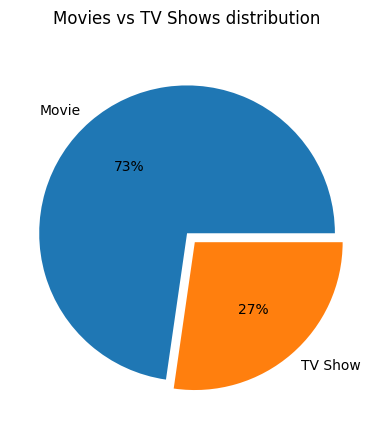

In [61]:
plt.pie(df_new.groupby("type")["type"].count(),labels = labels,
       explode=(0.08,0),autopct = "%0.0f%%")
plt.suptitle("Movies vs TV Shows distribution")
plt.show()

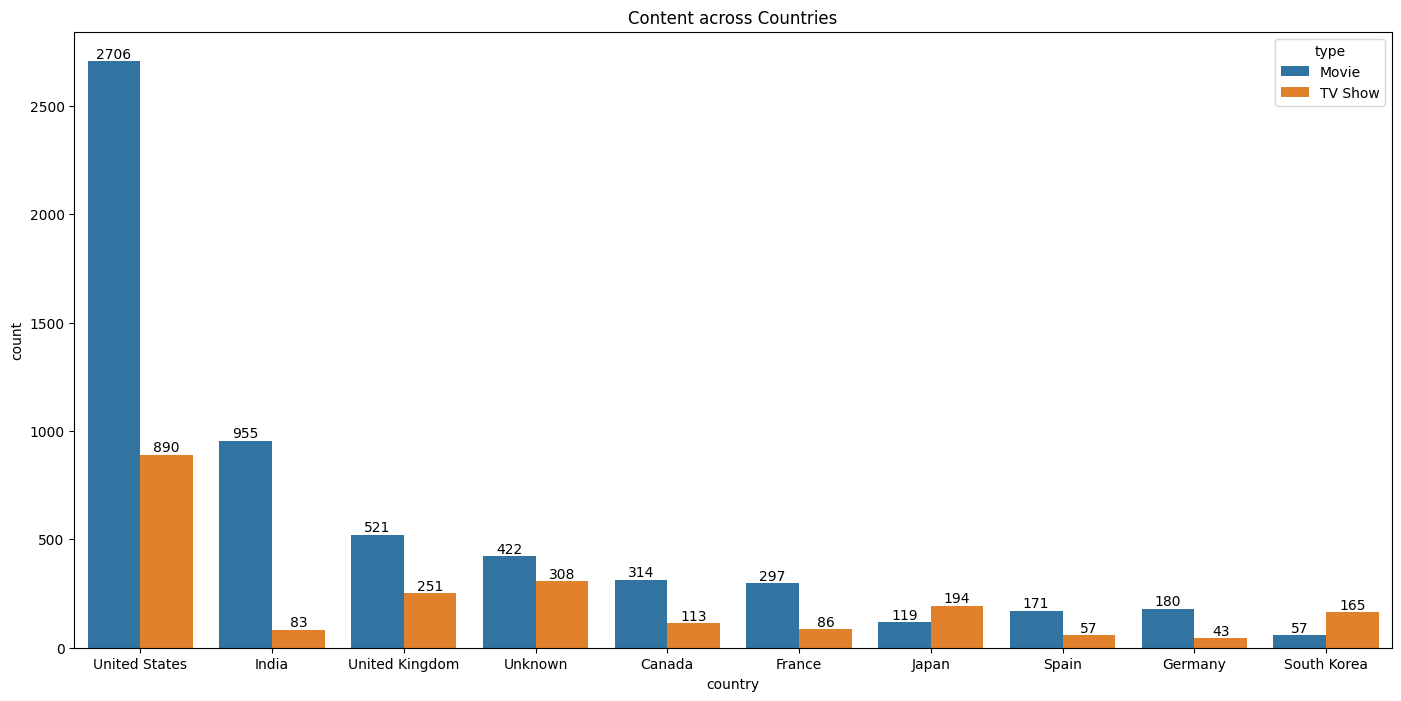

In [62]:
df_temp = df_new.drop_duplicates(subset = ["country","title"])

x = df_temp["country"].value_counts().head(10)

plt.figure(figsize = (17,8))
plt.title("Content across Countries")
label = sns.countplot(data = df_temp, x="country",hue="type",order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

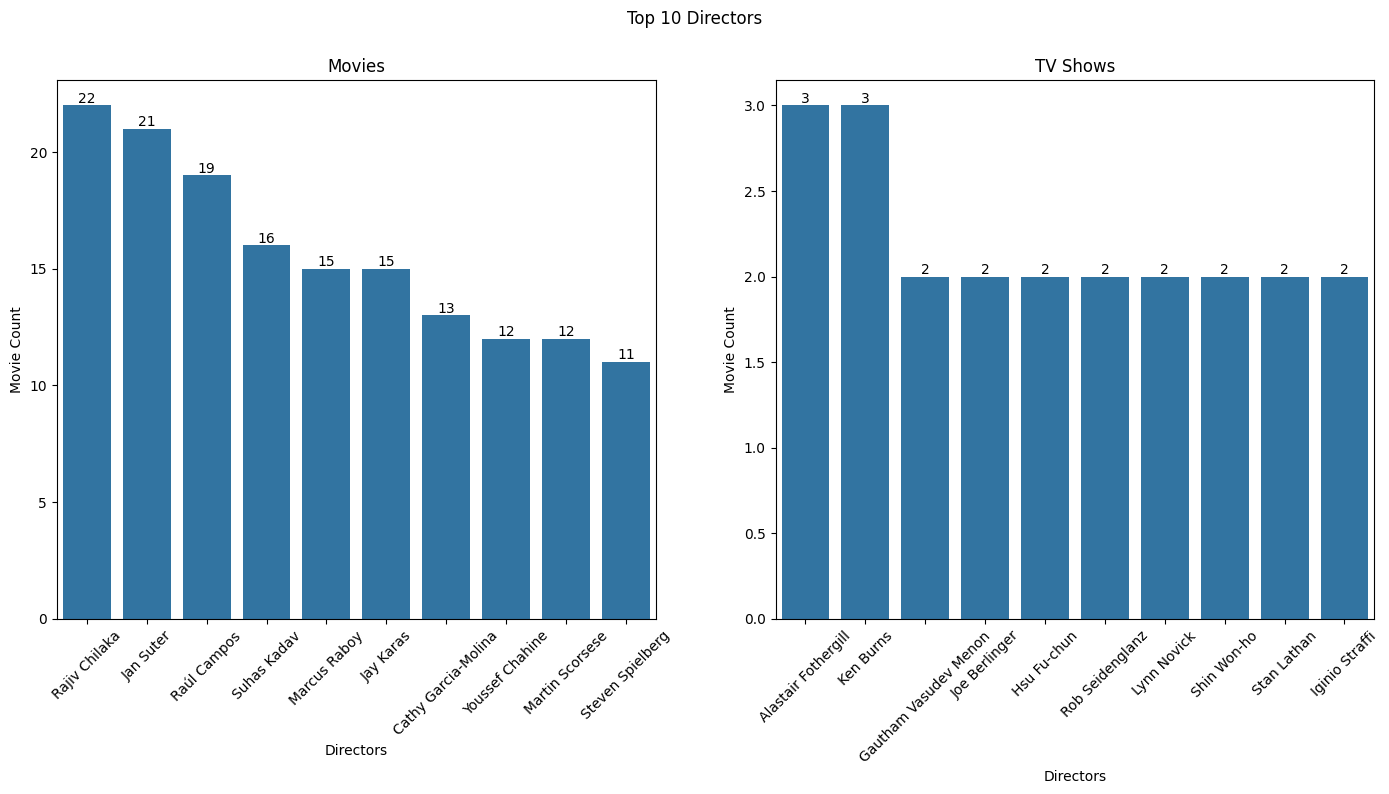

In [63]:
df_movies_temp = df_movies.drop_duplicates(subset = ["director","title"])
df_tvs_temp = df_tvs.drop_duplicates(subset = ["director","title"])

plt.figure(figsize=(17,7))
plt.suptitle("Top 10 Directors")

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x="director",
                     order = df_movies_temp["director"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Movie Count")

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x="director",
                     order = df_tvs_temp["director"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Movie Count")

plt.show()

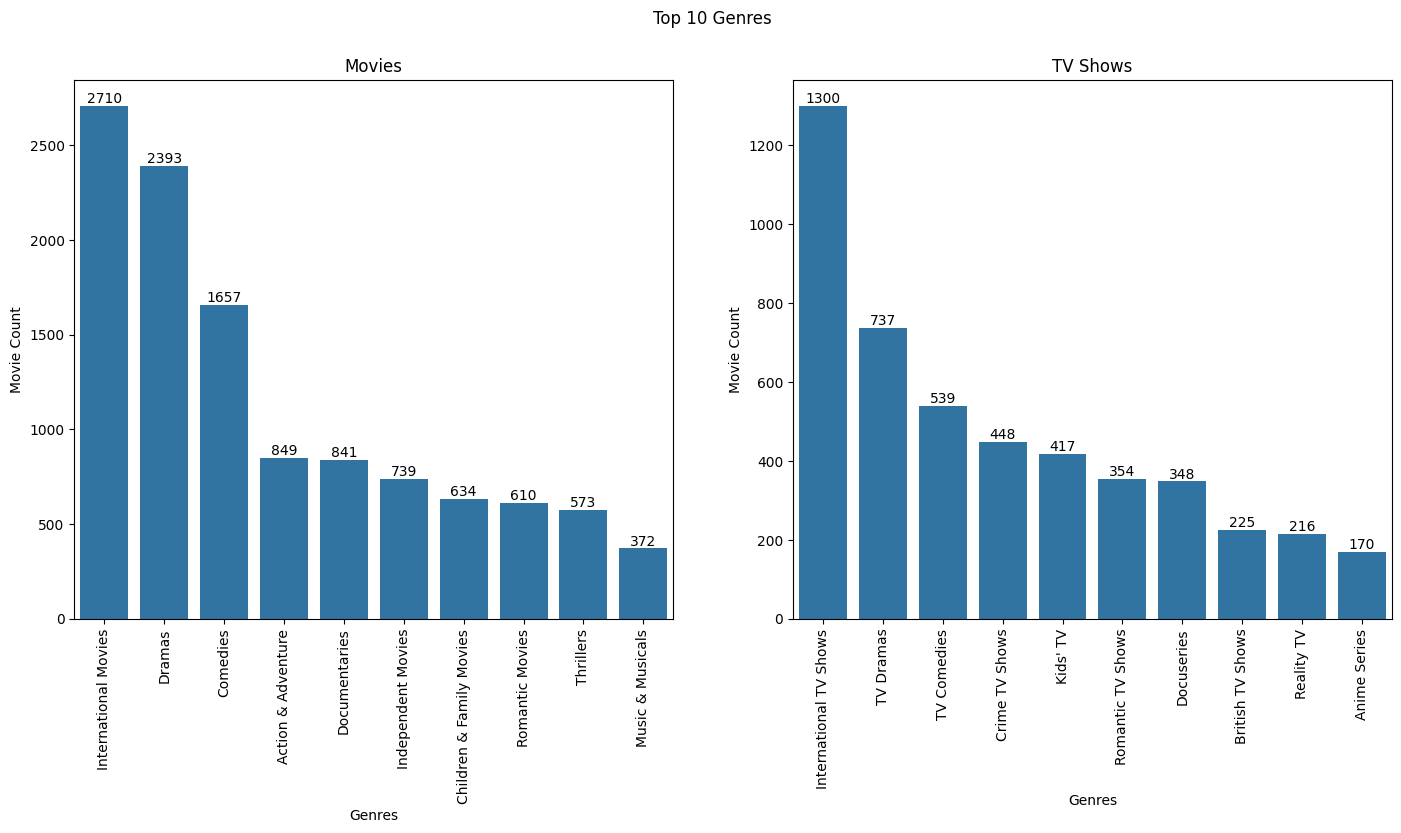

In [64]:
df_movies_temp = df_movies.drop_duplicates(subset = ["genre","title"])
df_tvs_temp = df_tvs.drop_duplicates(subset = ["genre","title"])

plt.figure(figsize=(17,7))
plt.suptitle("Top 10 Genres")

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x="genre",
                     order = df_movies_temp["genre"].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Movie Count")

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x="genre",
                     order = df_tvs_temp["genre"].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Movie Count")

plt.show()

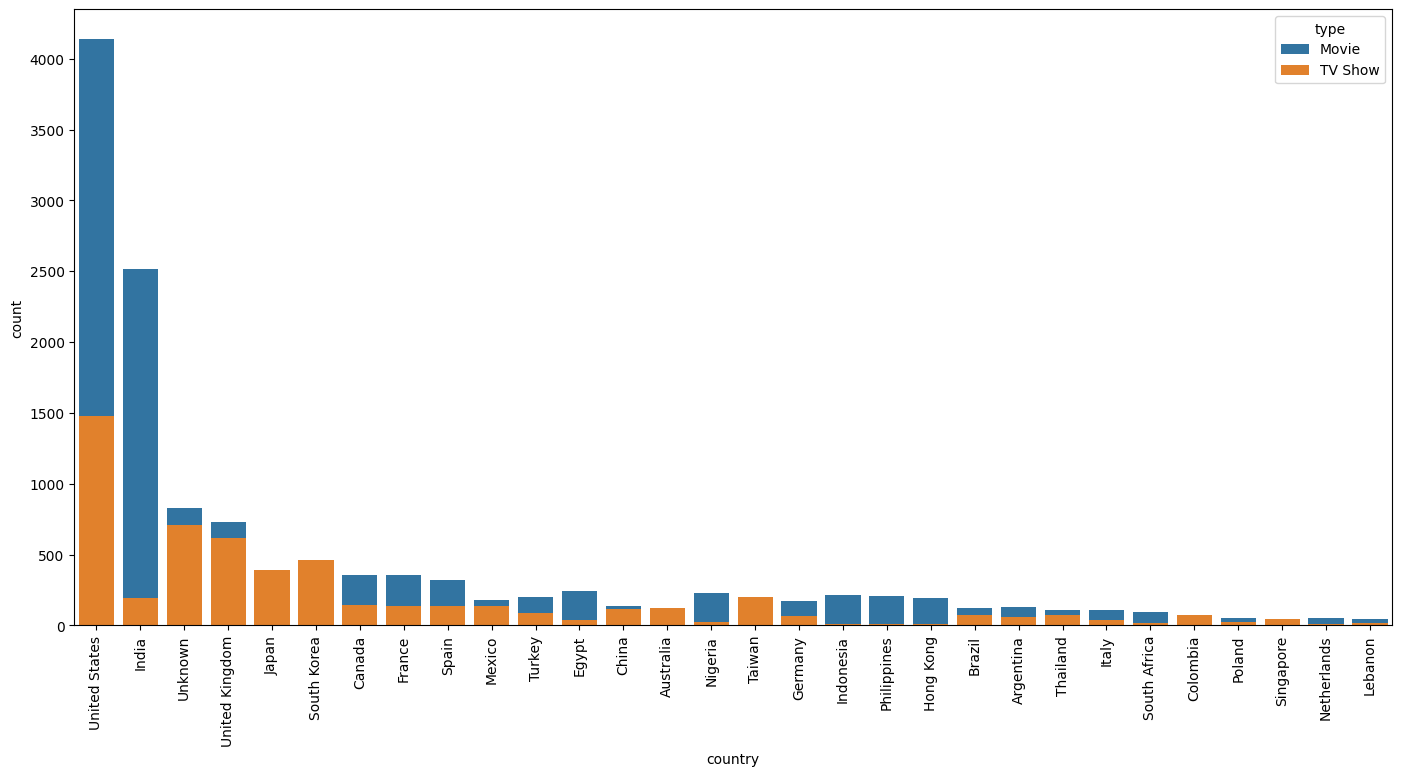

In [65]:
df_temp = df_new.drop_duplicates(subset = ["genre","title"])

plt.figure(figsize = (17,8))
plt.xticks(rotation=90)
sns.countplot(data = df_temp, x="country",hue = "type", dodge = False,
             order = df_temp["country"].value_counts().head(30).index)
plt.show()

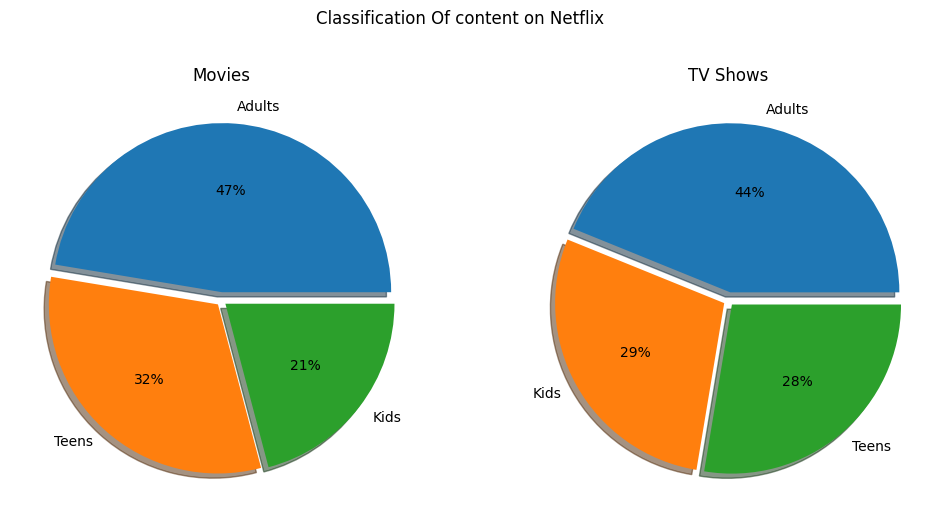

In [66]:
df_movies_temp = df_movies.drop_duplicates(subset = ["rating","title"])
df_tvs_temp = df_tvs.drop_duplicates(subset = ["rating","title"])

plt.figure(figsize=(12,6))
plt.suptitle("Classification Of content on Netflix")

plt.subplot(1,2,1)
plt.pie(df_movies_temp["rating"].value_counts(),labels= df_movies_temp["rating"].value_counts().index,
       autopct= "%.0f%%",explode =(0.05,0.03,0.03),shadow=True)

plt.title("Movies")

plt.subplot(1,2,2)
plt.pie(df_tvs_temp["rating"].value_counts(),labels= df_tvs_temp["rating"].value_counts().index,
       autopct= "%.0f%%",explode =(0.05,0.03,0.03),shadow=True)
plt.title("TV Shows")


plt.show()

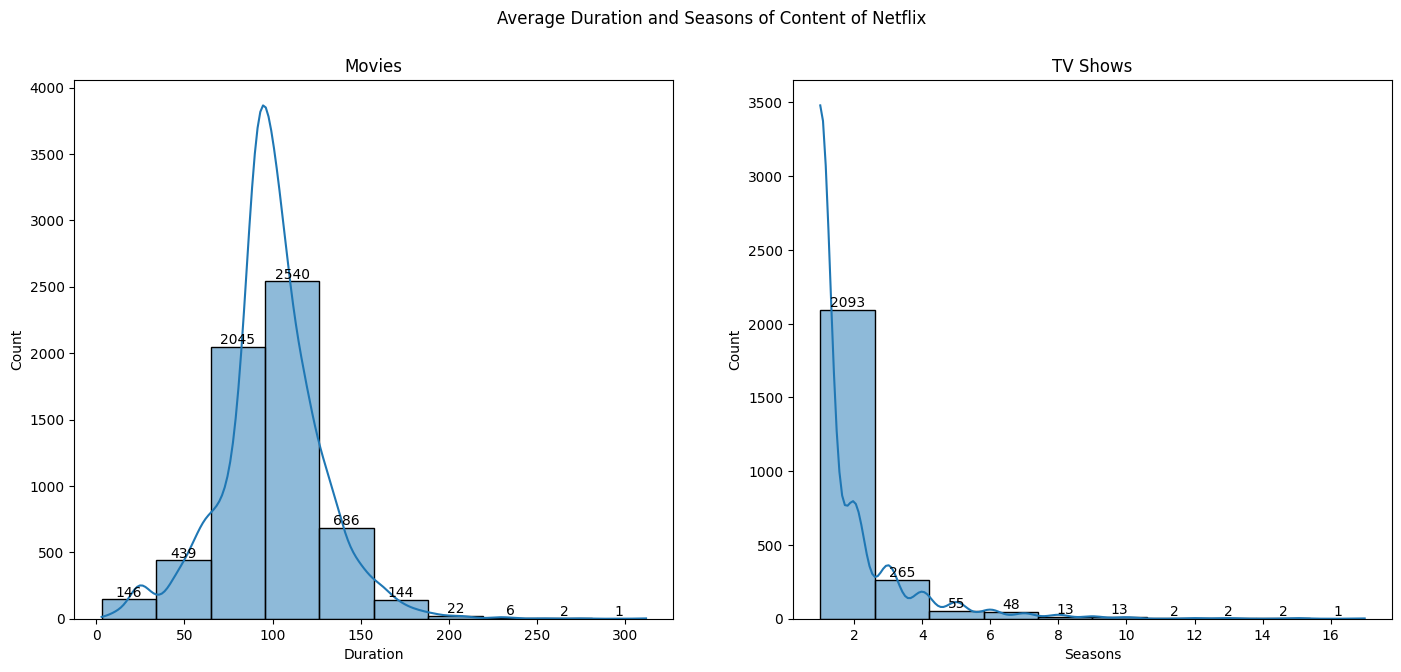

In [67]:
df_movies_temp = df_movies.drop_duplicates(subset = ["duration","title"])
df_tvs_temp = df_tvs.drop_duplicates(subset = ["seasons","title"])

plt.figure(figsize=(17,7))
plt.suptitle("Average Duration and Seasons of Content of Netflix")

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp["duration"].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
#plt.xticks(rotation=90)
plt.xlabel("Duration")

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp["seasons"].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
#plt.xticks(rotation=90)
plt.xlabel("Seasons")


plt.show()

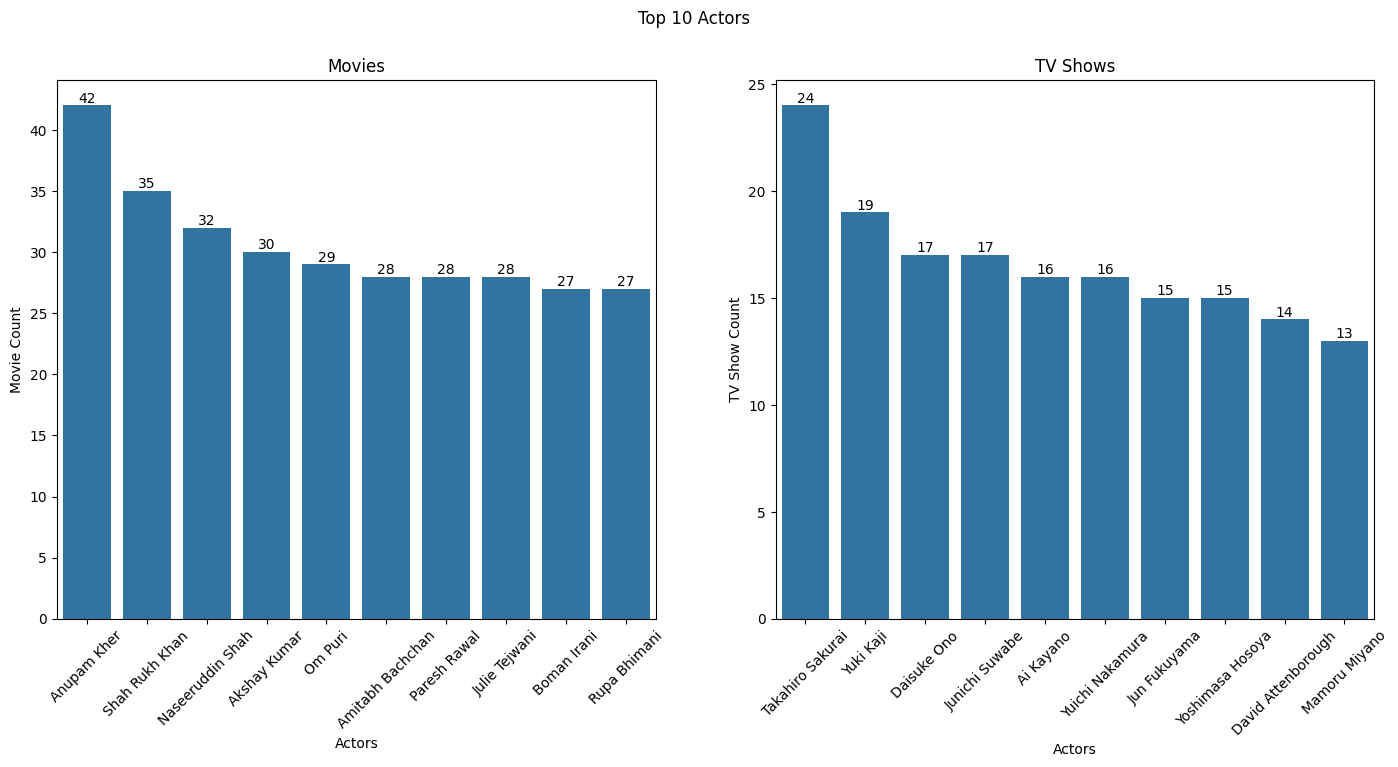

In [69]:
df_movies_temp = df_movies.drop_duplicates(subset = ["cast","title"])
df_tvs_temp = df_tvs.drop_duplicates(subset = ["cast","title"])

plt.figure(figsize=(17,7))
plt.suptitle("Top 10 Actors")

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x="cast",
                     order = df_movies_temp["cast"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Actors")
plt.ylabel("Movie Count")

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x="cast",
                     order = df_tvs_temp["cast"].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Actors")
plt.ylabel("TV Show Count")

plt.show()

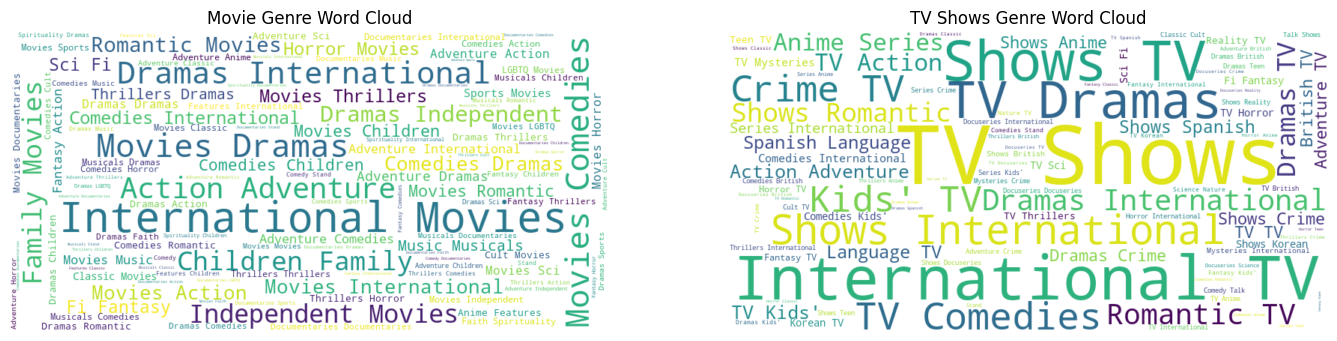

In [75]:
genre_text = " ".join(df_movies["genre"])
wordcloud = WordCloud(width=800,height=400,background_color="white").generate(genre_text)

plt.figure(figsize=(17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title("Movie Genre Word Cloud")

genre_text = " ".join(df_tvs["genre"])
wordcloud = WordCloud(width=800,height=400,background_color="white").generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title("TV Shows Genre Word Cloud")
plt.show()

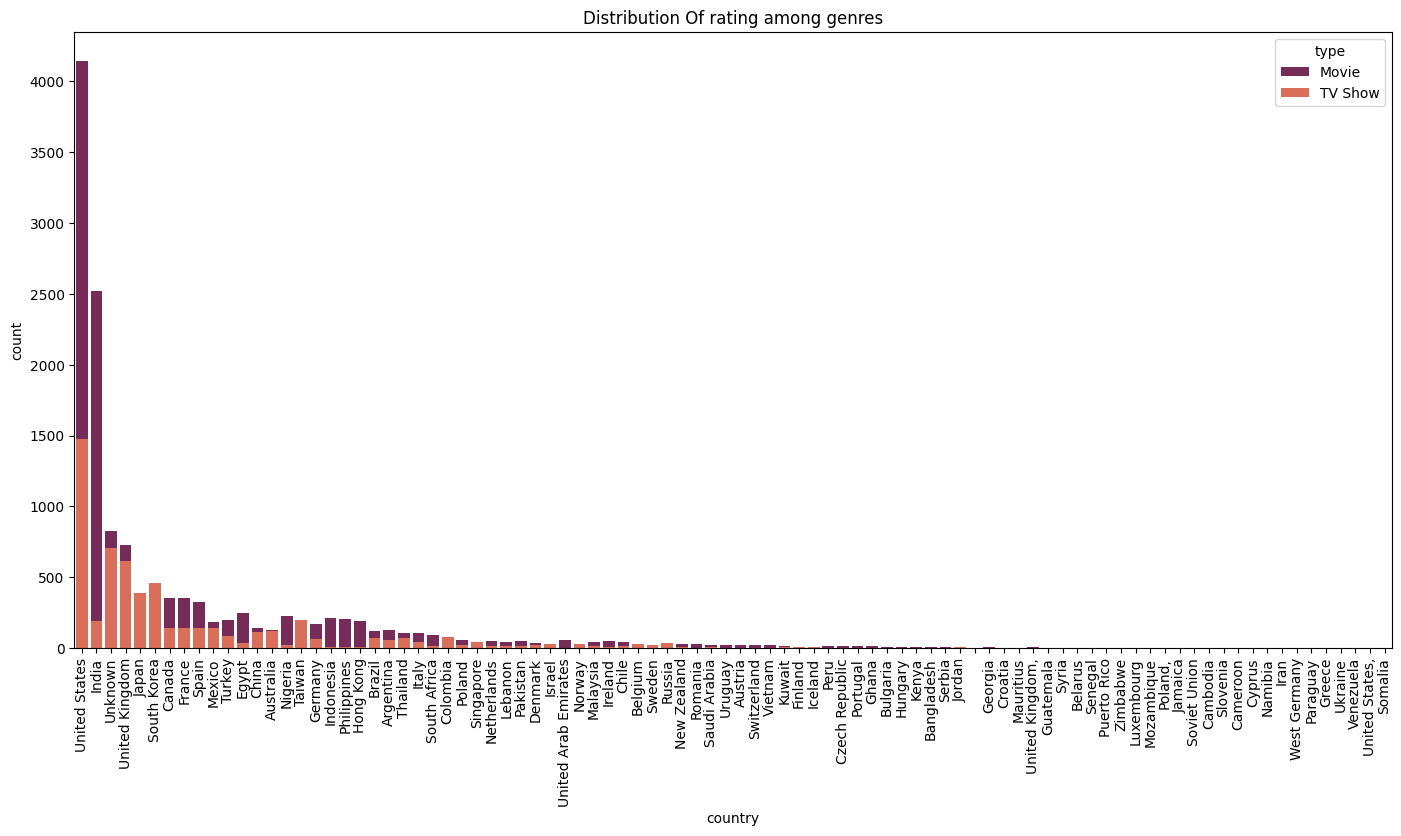

In [77]:
df_temp = df_new.drop_duplicates(subset = ["genre","title"])

plt.figure(figsize = (17,8))
plt.title("Distribution Of rating among genres")
sns.countplot(data = df_temp, x="country",hue = "type", dodge = False,
             order = df_temp["country"].value_counts().index,palette="rocket")
plt.xticks(rotation=90)
plt.show()

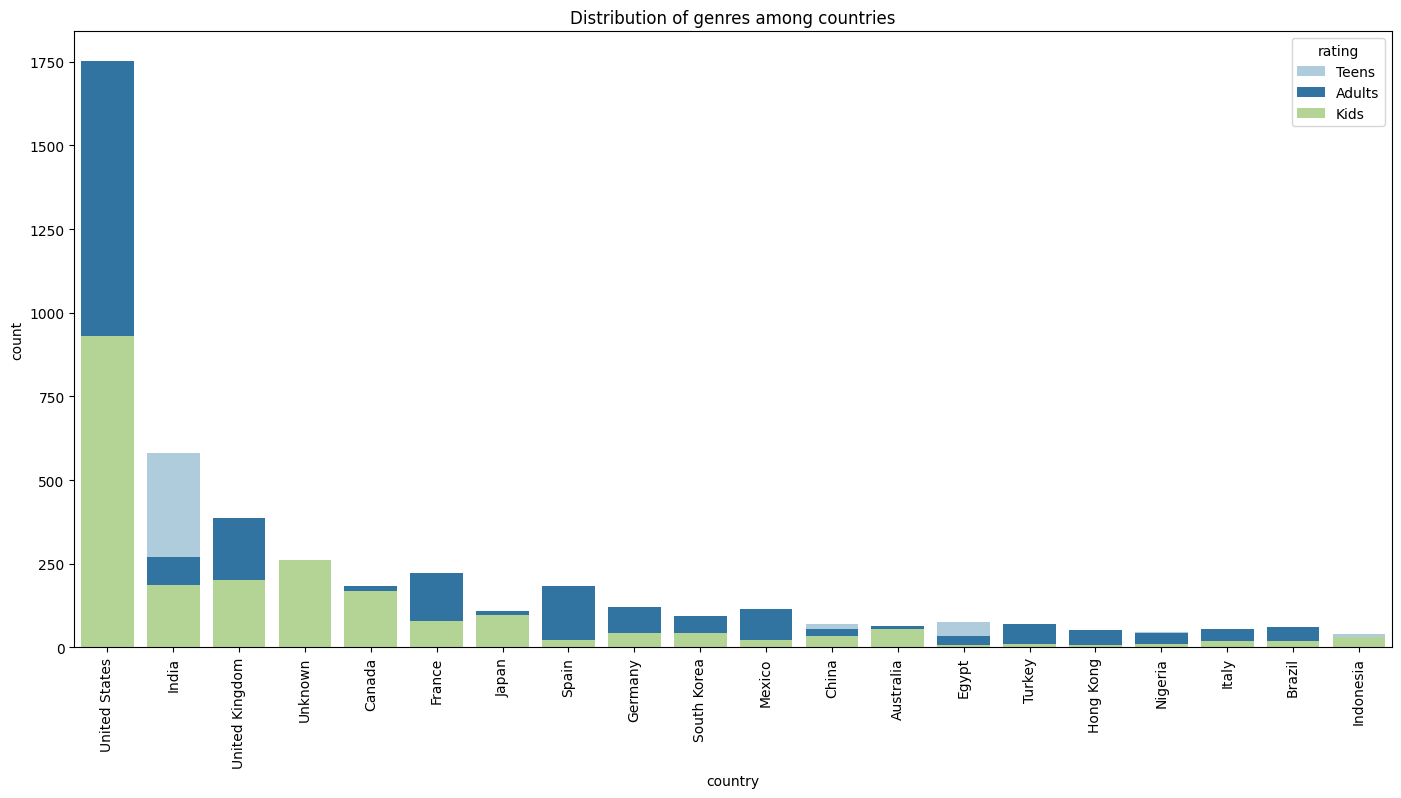

In [80]:
df_temp = df_new.drop_duplicates(subset = ["country","title"])

plt.figure(figsize = (17,8))
plt.title("Distribution of genres among countries")
sns.countplot(data = df_temp, x="country",hue = "rating", dodge = False,
             order = df_temp["country"].value_counts().head(20).index,palette="Paired")
plt.xticks(rotation=90)
plt.show()